In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("wines_properties.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## 1) Principal Component Analysis and Circle of Correlations

### Separate features and target

In [5]:
features = df.columns[:-1]

In [6]:
target = df.columns[-1]

In [7]:
x = df.loc[:, features].values
y = df.loc[:, target].values

### Standardization of the features

In [8]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

### PCA Projection to 2 Dimensions

In [9]:
from sklearn.decomposition import PCA

In [10]:
my_pca = PCA(n_components=2)

In [11]:
principal_components = my_pca.fit_transform(x)

In [12]:
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

In [13]:
principal_df.head()

,Principal Component 1,Principal Component 2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [14]:
PCs = my_pca.components_ #Loadings of the two Principal Components

In [15]:
PCs

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

In [28]:
PCs[0]

array([ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
        0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
        0.29671456,  0.37616741,  0.28675223])

In [18]:
PCs.shape[1]

13

### Circle of Correlations Visualization

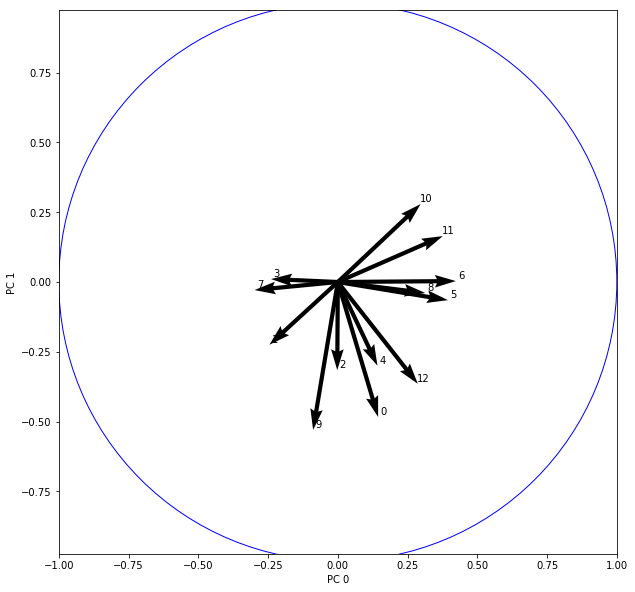

In [19]:
# Use quiver to generate the basic plot
fig = plt.figure(figsize=(10,10))
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
           PCs[0,:], PCs[1,:], 
           angles='xy', scale_units='xy', scale=1)

# Add labels based on feature names (here just numbers)
feature_names = np.arange(PCs.shape[1])
for i,j,z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, feature_names):
    plt.text(j, i, z, ha='center', va='center')

# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])

# Label axes
plt.xlabel('PC 0')
plt.ylabel('PC 1')

# Done
plt.show()

### Analyzing the loading vectors of the principal components

The variable that is best represented by component 0 is variable 6 (Flavanoids)

The variable that is best represented by component 1 is variable 9 (Colour)

The first loading vector places most of its weight on the variables 6, 11 and 5 and almost no weights on the variables 2, 9 and 0. -> focus on Total_Phenols, Flavanoids and the concentration of OD280.

The second loading vector places most of its weight on the variables 9, 0 and 12 and almost no weights on the variables 6, 3 and 7 -> focus on alcohol level, colour and level of proline.

## 2) Hierarchical Clustering

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [21]:
linked = linkage(x, method='complete', metric='euclidean')

In [22]:
labelList = range(1, 179)

In [23]:
linked[0:5]

array([[  9.        ,  47.        ,   1.16411367,   2.        ],
       [131.        , 133.        ,   1.19160238,   2.        ],
       [ 11.        ,  12.        ,   1.20935571,   2.        ],
       [ 15.        ,  53.        ,   1.22551046,   2.        ],
       [ 92.        , 107.        ,   1.24538798,   2.        ]])

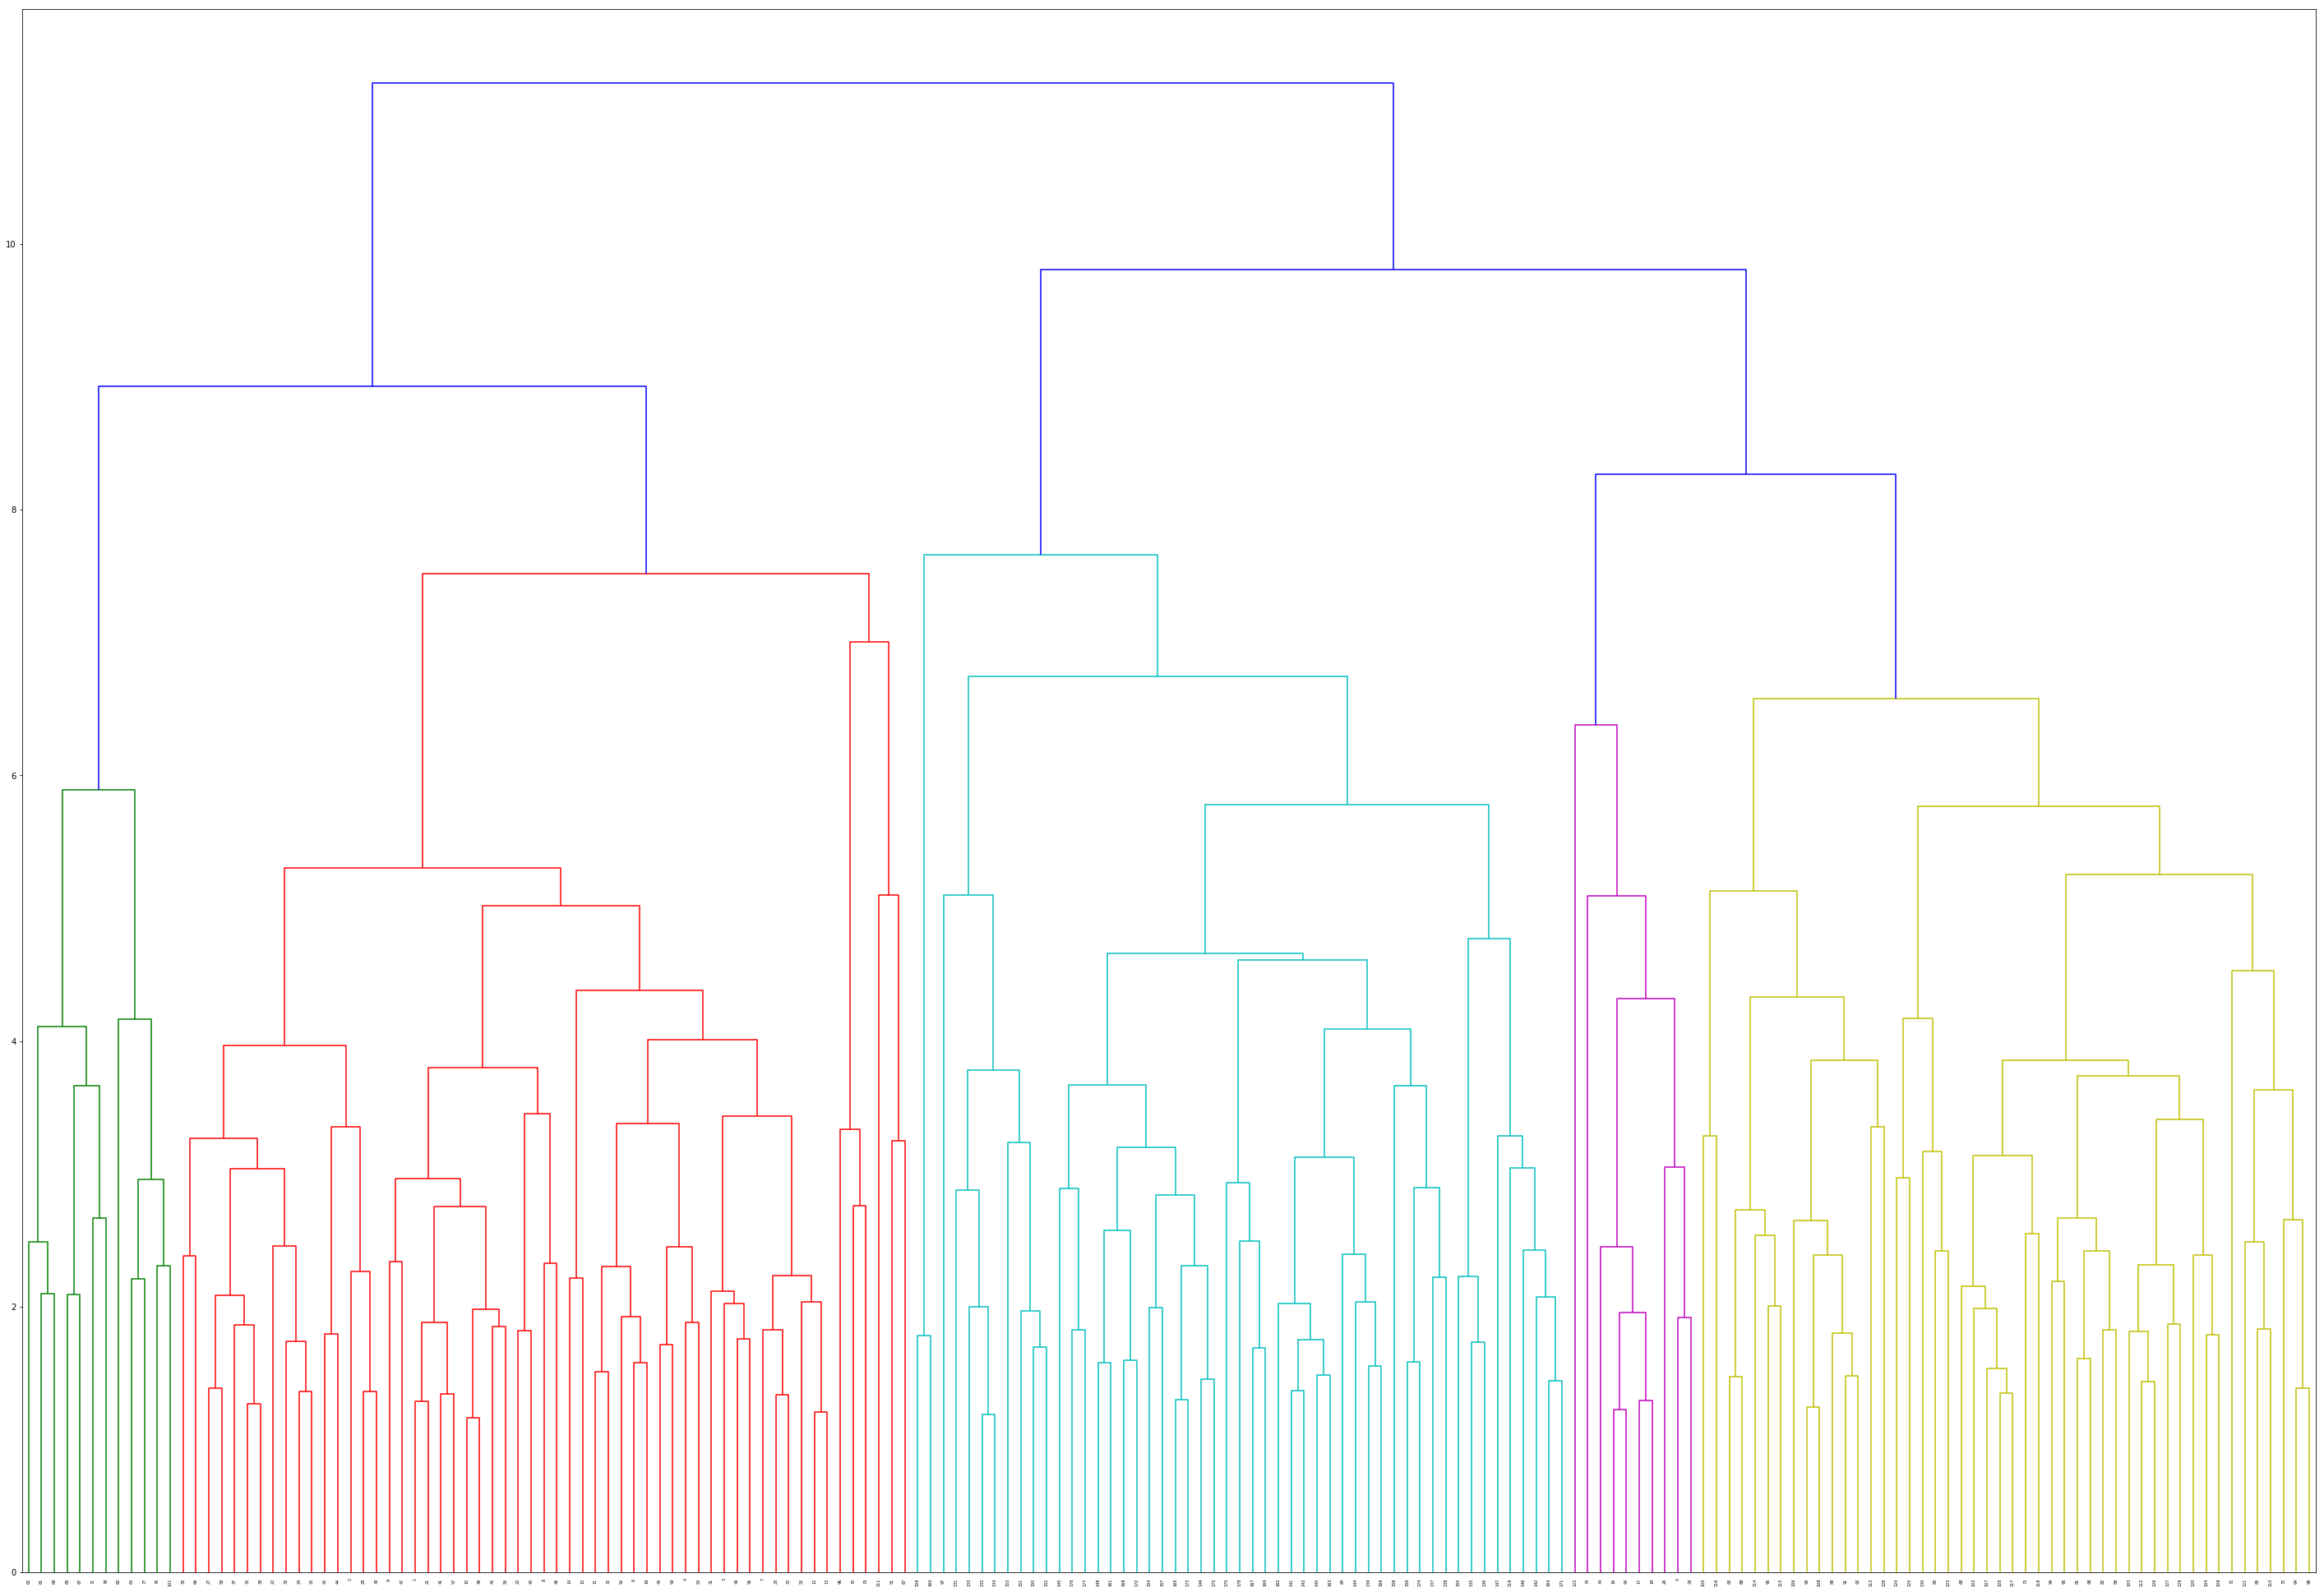

In [24]:
plt.figure(figsize=(50,35))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show() 

### Selecting the number of Clusters

The similarity of two observations is based on the location on the vertical axis where branches containing the two observations first are fused together. 
Based on the dendrogram above we can conclude that most likely there are 3 - 5 clusters present in the data. With other techniques like the silhouette analysis or the elbow method we can validate the number of clusters which is most likely. We now set the number of clusters equal to 3 and continue with the K-Means clustering algorithm.

## 3) K-Means Clustering Algorithm

In [26]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(x)

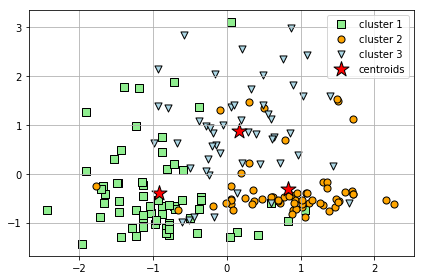

In [27]:
# cluster 1
plt.scatter(x[y_km == 0, 0],
            x[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
# cluster 2
plt.scatter(x[y_km == 1, 0],
            x[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
# cluster 3
plt.scatter(x[y_km == 2, 0],
            x[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
# centroids 
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

### 3.1) Silhouette Analysis

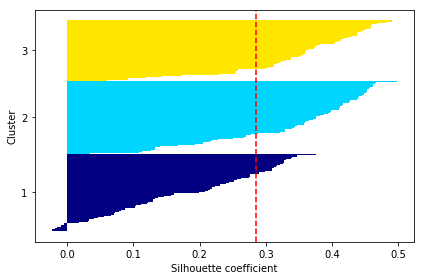

In [70]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

### 3.2) Clusters plotted on the first two dimensions of the PCA

Text(0, 0.5, 'Principal Component 1')

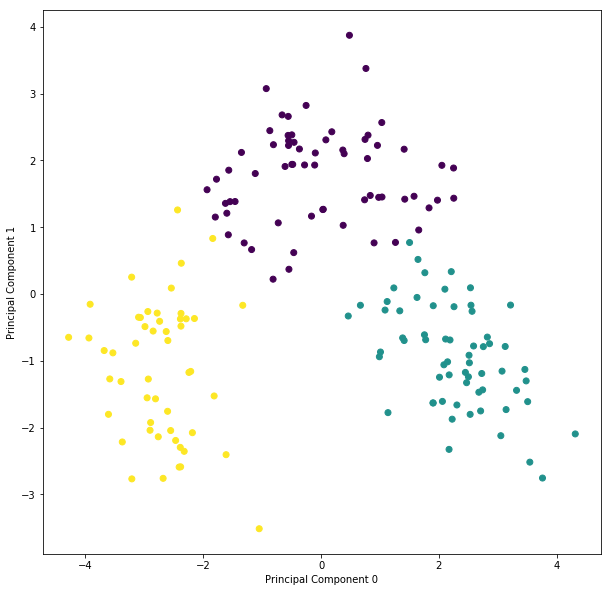

In [77]:
plt.figure(figsize=[10,10])
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'], c=y_km)
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')

### 3.3) Barycenters of the Clusters

In [78]:
km_pca = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km_pca = km_pca.fit_predict(principal_df)

Text(0, 0.5, 'Principal Component 1')

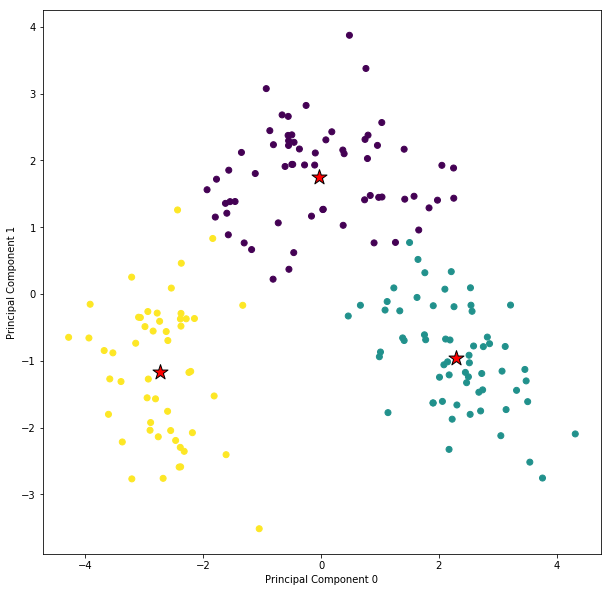

In [84]:
plt.figure(figsize=[10,10])
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'], c=y_km)
plt.scatter(km_pca.cluster_centers_[:, 0],
            km_pca.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')

### 3.4) Interpretation of each cluster with barycenter and PCA

The points identified in the previous do not correspond to a data point from the given data but rather display the cluster centroids. Thus, we were not able to draw any conclusions from these points and to compare the results to the findings of the principal component analysis.

## 4) Function 1

Write a function that takes in input the dataset and that returns 1) the value of K (for the K-means) that is associated
with the best overall silhouette of the K-means algorithm and 2) the plot of the correspondent clusters on the space of
the first two dimensions of the PCA (performed over the same dataset).

In [85]:
def KMeans_Silhouette(data):
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples, silhouette_score
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    %matplotlib inline
    
    df = pd.read_csv(data)
    x = df.loc[:].values
    x = StandardScaler().fit_transform(x)
    
    score_list = []
    
    for n_clusters in range(2,8):
        km = KMeans(n_clusters=n_clusters,
                    init='random',
                    n_init=10,
                    max_iter=300,
                    tol=1e-04,
                    random_state=0)
        y_km = km.fit_predict(x)
        silhouette_avg = silhouette_score(x, y_km)
        #print('For n_clusters = ' + str(n_clusters) + ' the average silhouette score is: ' + str(silhouette_avg))
        score_list.append(silhouette_avg)
        
    K_best = score_list.index(max(score_list))+2
    print('The best number of clusters is K = ' + str(K_best) + ' with a silhouette score of ' + str(max(score_list)))
    
    km_best = KMeans(n_clusters=K_best,
                    init='random',
                    n_init=10,
                    max_iter=300,
                    tol=1e-04,
                    random_state=0)
    y_km_best = km_best.fit_predict(x)
    
    my_pca = PCA(n_components=2)
    principal_components = my_pca.fit_transform(x)
    principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 0', 'Principal Component 1'])
    #print(principal_df['Principal Component 0'].head())
    
    plt.figure(figsize=(10,10))
    plt.scatter(principal_df['Principal Component 0'], principal_df['Principal Component 1'], c=y_km_best)
    plt.xlabel('Principal Component 0')
    plt.ylabel('Principal Component 1')
    
    plt.show()


The best number of clusters is K = 3 with a silhouette score of 0.30773604383565206


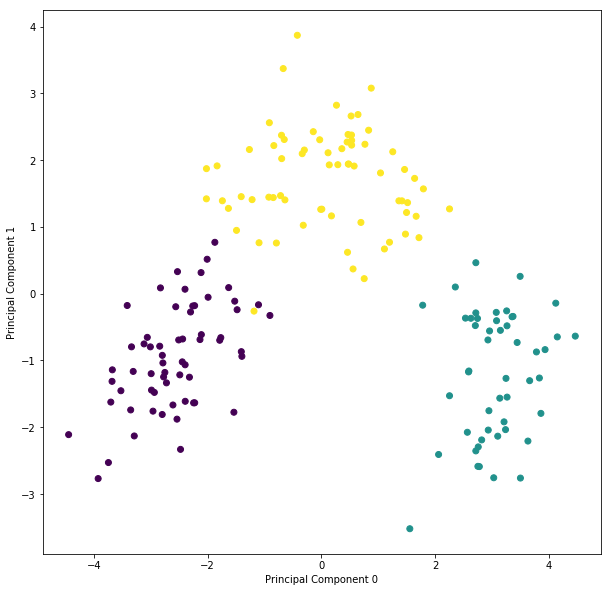

In [86]:
KMeans_Silhouette('wines_properties.csv')

## 5) Function 2

Write a function that takes in input the dataset: the function performs the PCA and returns the circle of correlations of
each pair of principal components (1 and 2, 1 and 3, 1 and …, 2 and 1, 2 and 3, …). Plot all the circles in the same plot
and/or in a series of plots 3x3.

In [33]:
def PCA_circle(data):
    import pandas as pd
    import matplotlib.pyplot as plt
    import itertools as it
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    
    df = pd.read_csv(data)
    x = df.loc[:].values
    x = StandardScaler().fit_transform(x)
    
    my_pca = PCA()
    principal_components = my_pca.fit_transform(x)
    PCs = my_pca.components_
    
    rows = []
    for a in range(PCs.shape[0]):
        rows.append(a)
    
    fig = plt.figure(figsize=(30, 50))
    count = 1
    for v in list(it.permutations(rows, 2)):
        plt.subplot(PCs.shape[0],PCs.shape[0]-1,count)
        plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
                   PCs[v[0],:], PCs[v[1],:], 
                   angles='xy', scale_units='xy', scale=1)

        # Add labels based on feature names (here just numbers)
        feature_names = np.arange(PCs.shape[1])
        for i,j,z in zip(PCs[v[1],:]+0.02, PCs[v[0],:]+0.02, feature_names):
            plt.text(j, i, z, ha='center', va='center')

        # Add unit circle
        circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
        plt.gca().add_artist(circle)

        # Ensure correct aspect ratio and axis limits
        plt.axis('equal')
        plt.xlim([-1.0,1.0])
        plt.ylim([-1.0,1.0])

        # Label axes
        plt.xlabel('PC ' + str(v[0]))
        plt.ylabel('PC ' + str(v[1]))

        count +=1

    plt.show()        

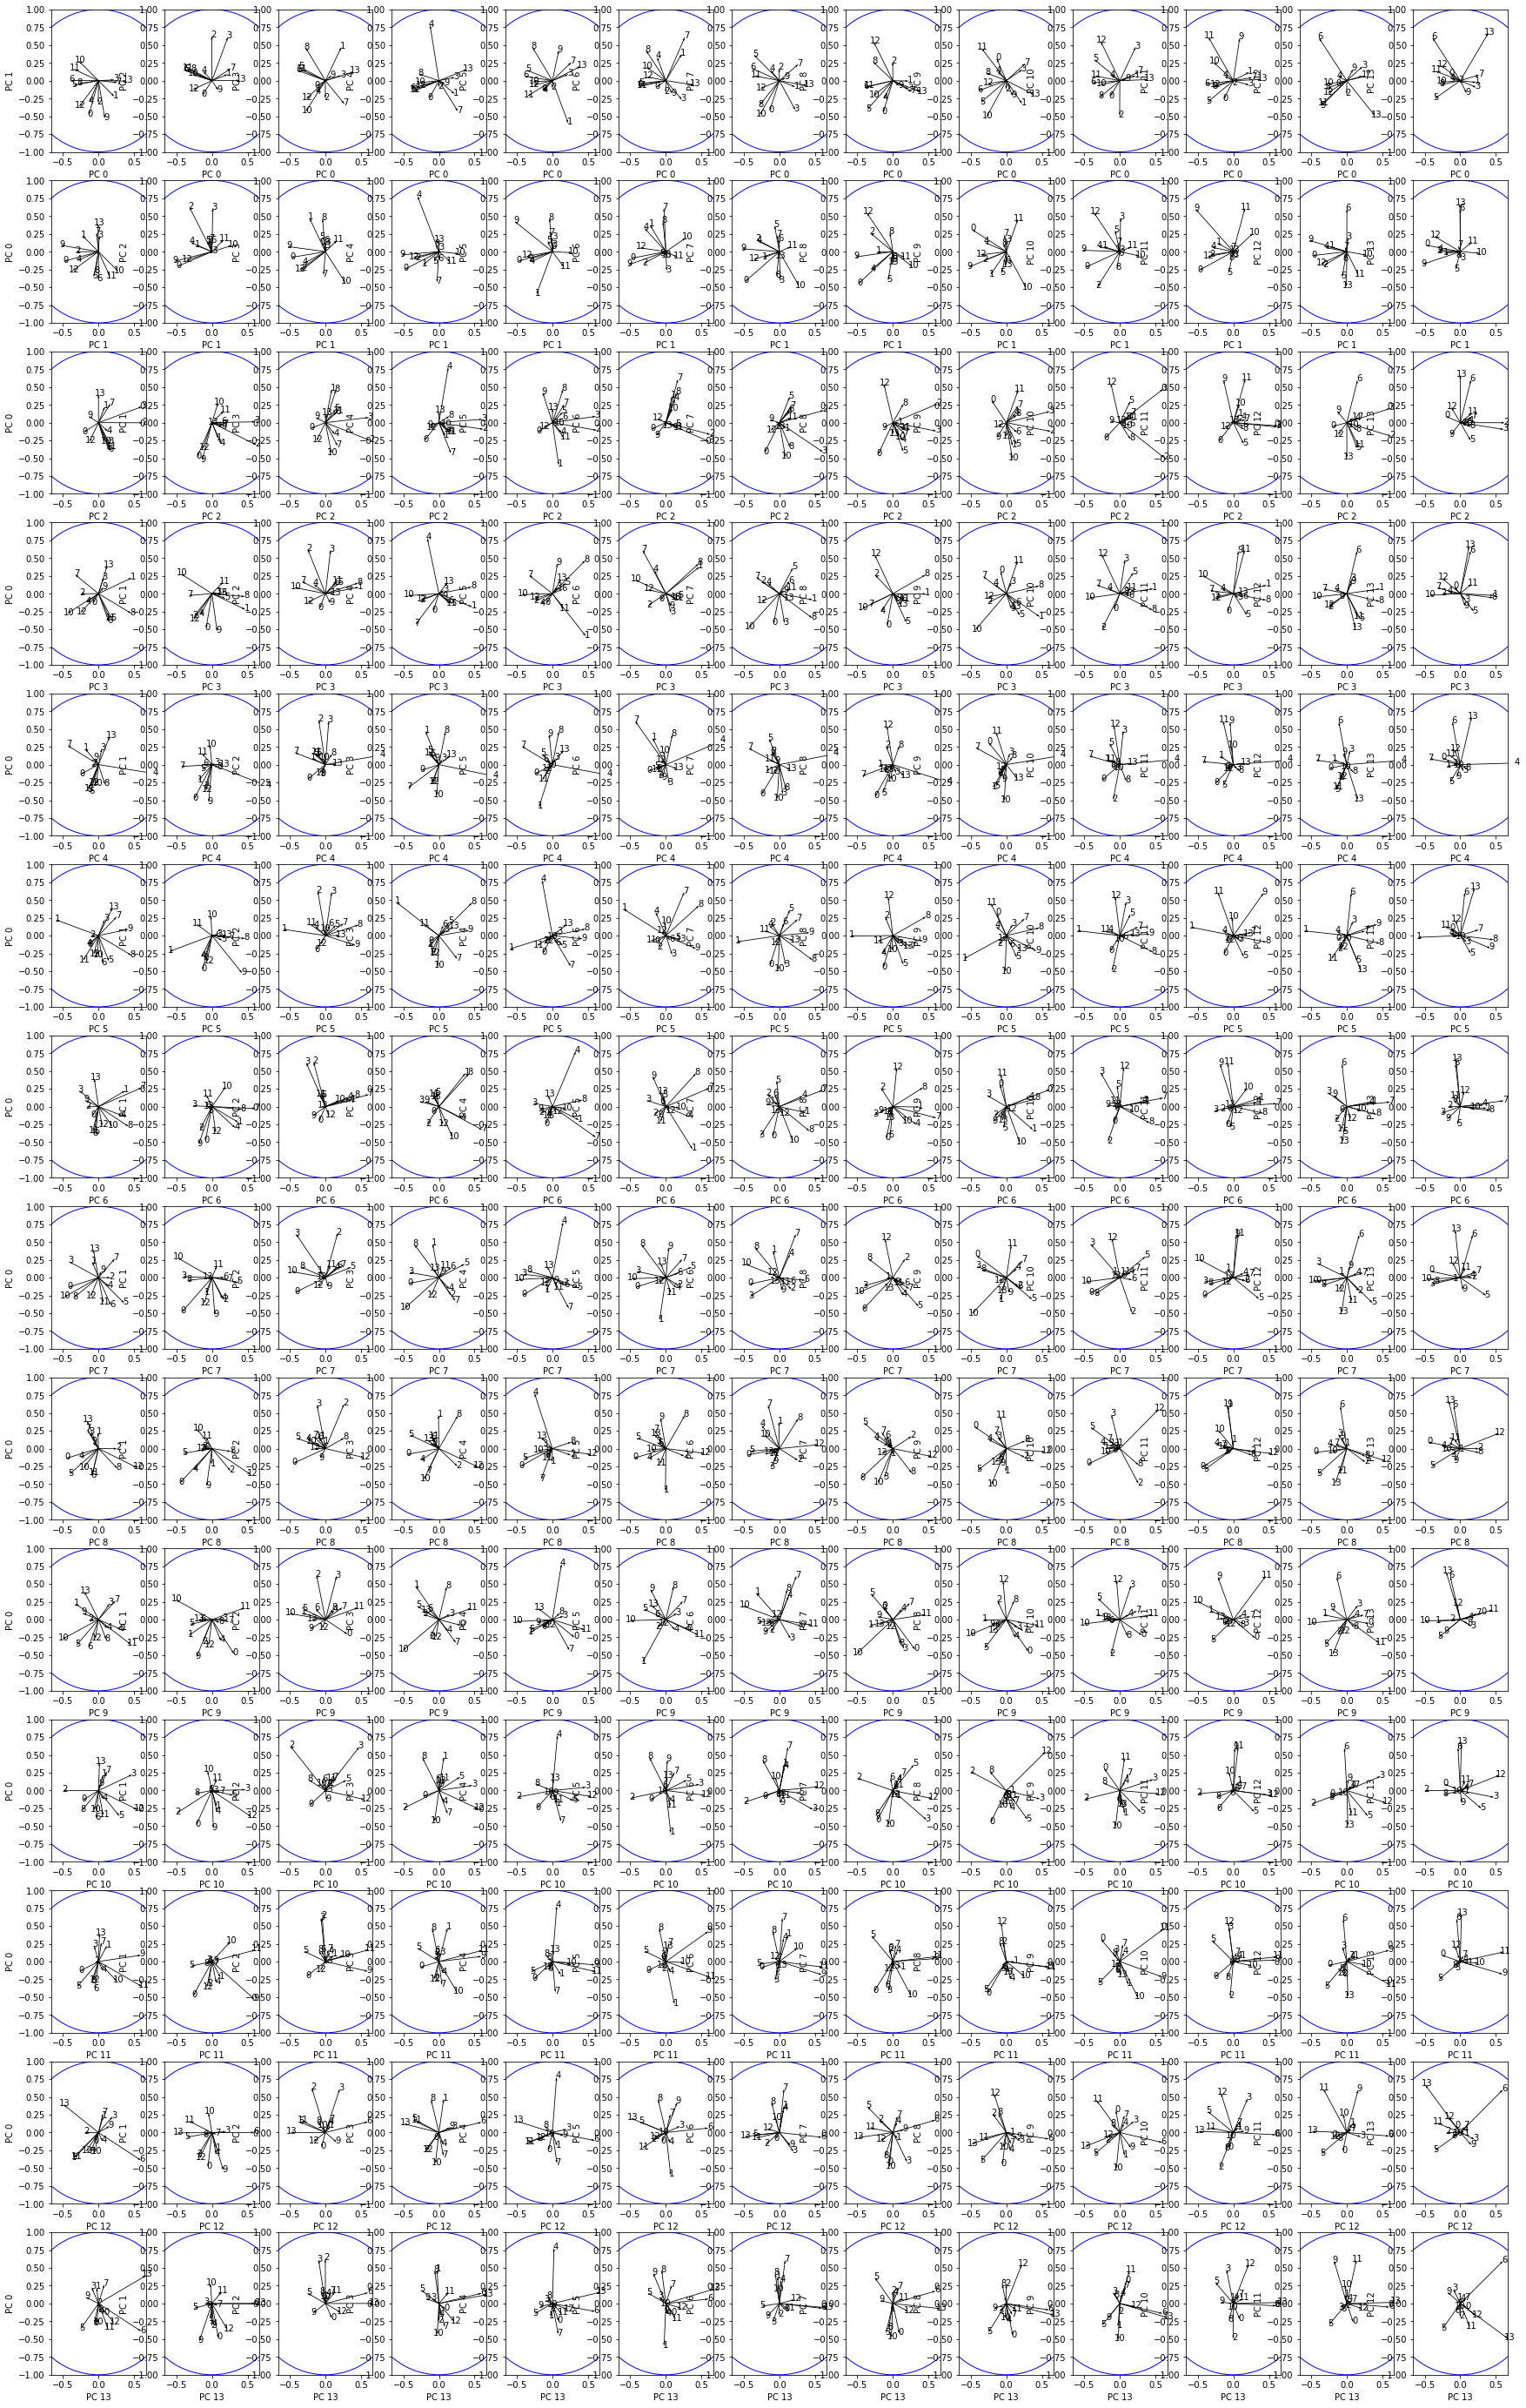

In [34]:
PCA_circle("wines_properties.csv")